In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) # displays all the columns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# accessing the file
file_path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

* The data contains 17 columns.

In [ ]:
# checking for null values
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


* The dataset does not contain any null values

In [ ]:
df.duplicated().sum()

24

In [ ]:
# removing the duplicates
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [ ]:
# description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


Description of the data

* The dataset includes categorical, binary, and numerical features.
* The NObeyesdad represents the target variable.

DataTypes
* Continuous variables: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE.
* Categorical variables: Gender, CAEC, CALC, MTRANS, and the target variable NObeyesdad.
* Binary variables: family_history_with_overweight, FAVC, SMOKE, SCC.

* The average age is 24, while the minumum and maximum age respectvely are 14, and 26
* The average height in meters is 1.7, while the minumum and maximum height in meters is 1.45, and 1.98.
* When it comes to weight, the average weight in kilograms is 87, while the minimum and the maximum weight is 39, and 173.
* On average, the frequency of vegetabe consumption (FCVC) IS 2.42, and the minumum and the maximum respectively are 1.00, and 3.00.
* Regarding the number of meals consumed daily (NCP0), on average people consume 3 meals, while the minimum and the maximum number of meals that are consumed on a daily are 1, and 4 respectively.
* The average amount of water consumed daily (CH2O) is 2.01, while the minimum and the maximum amount of water consumed daily are 1, and 3 respectively.
* On the frequency of physical activity (FAF), on average, the people have a frequency of physical activity of 1.01, while the minimum and maximum frequency of physical activity are 0.00 and 3.00 respectively.
* On average the time spent using technological devices(TUE) is 0.66, while the minimum and the maximum time spent on using technological devoces are 0.00 and 2.00

In [ ]:
df.select_dtypes(exclude = 'object').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


## Outlier detection and handling

In [ ]:
# Using Z-score to detect outliers in numerical columns
from scipy.stats import zscore

numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(df[numerical_columns]))
outliers = (z_scores > 3).any(axis=1)  # Identify rows with any Z-score > 3

# Count and remove outliers
outlier_count = outliers.sum()
df_cleaned = df[~outliers]

print("Outlier Detection and Handling Complete")
print("Number of outliers detected and removed:", outlier_count)
print("\
Shape of dataset after outlier removal:", df_cleaned.shape)

Outlier Detection and Handling Complete
Number of outliers detected and removed: 24
Shape of dataset after outlier removal: (2063, 17)


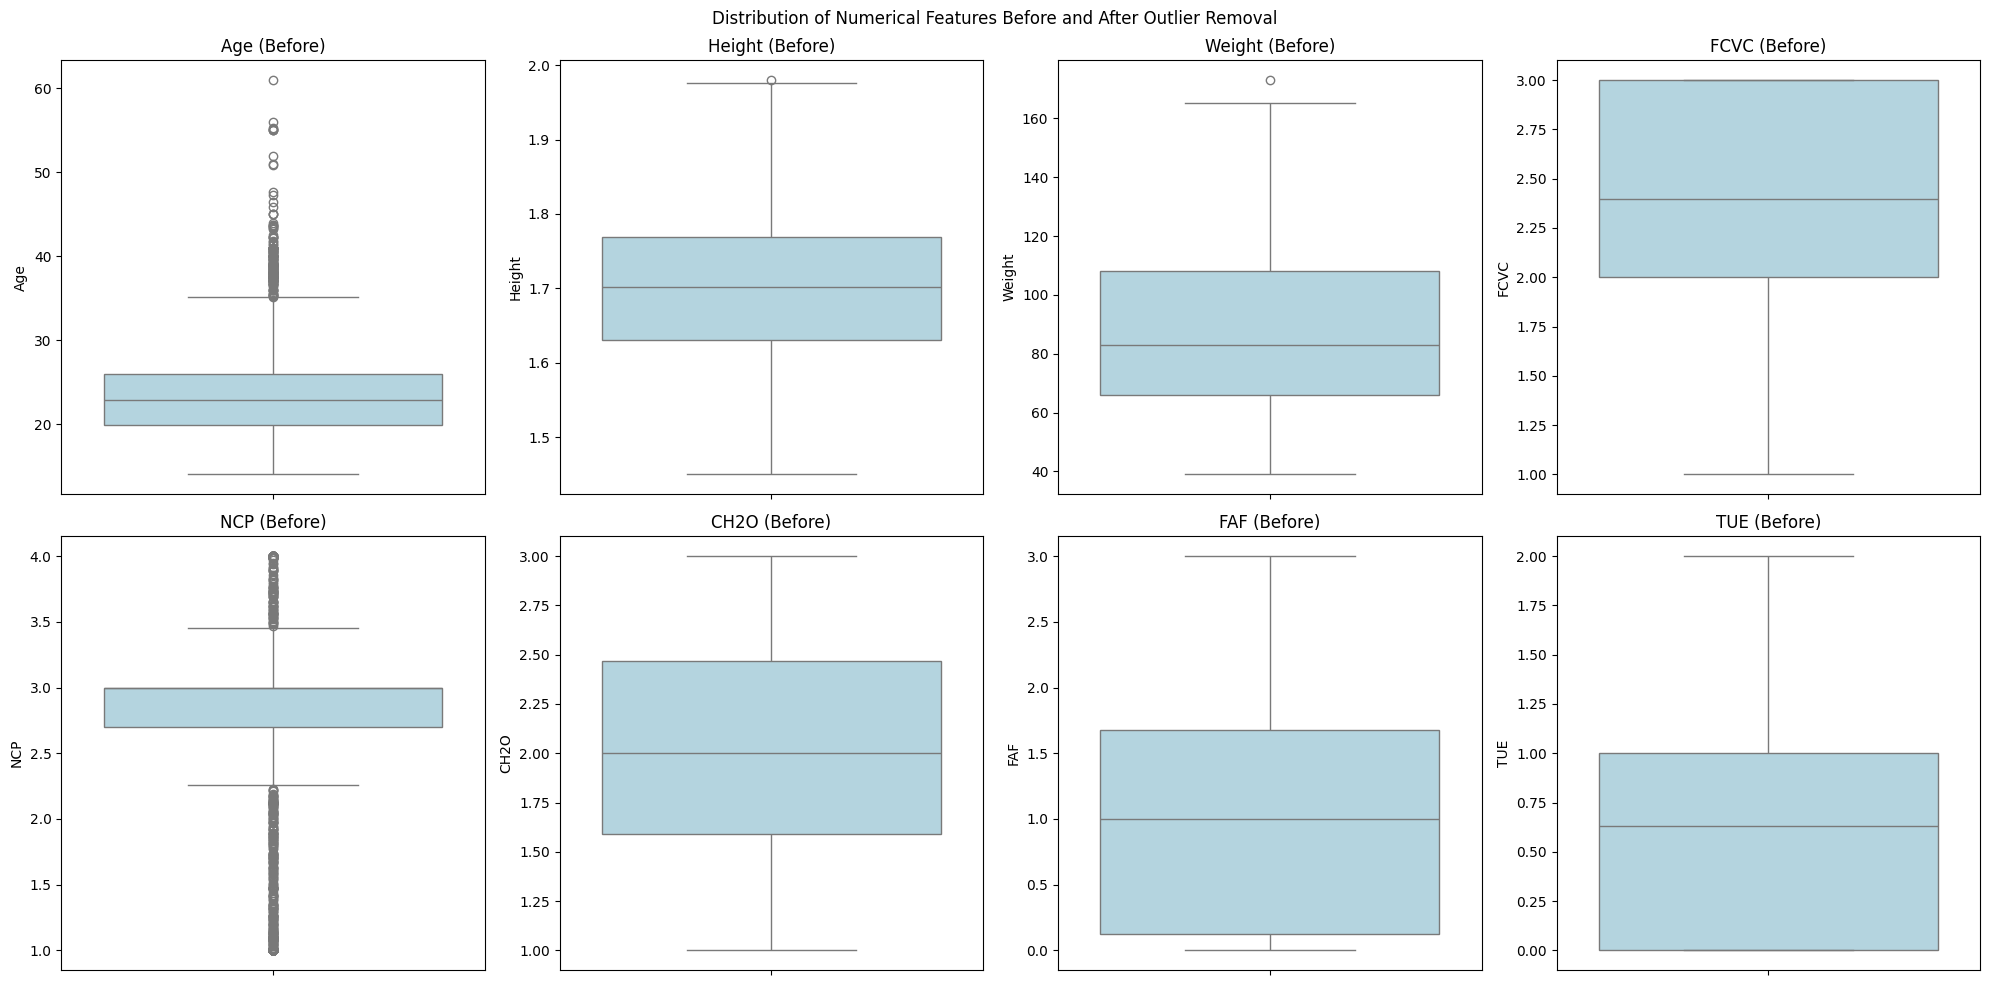

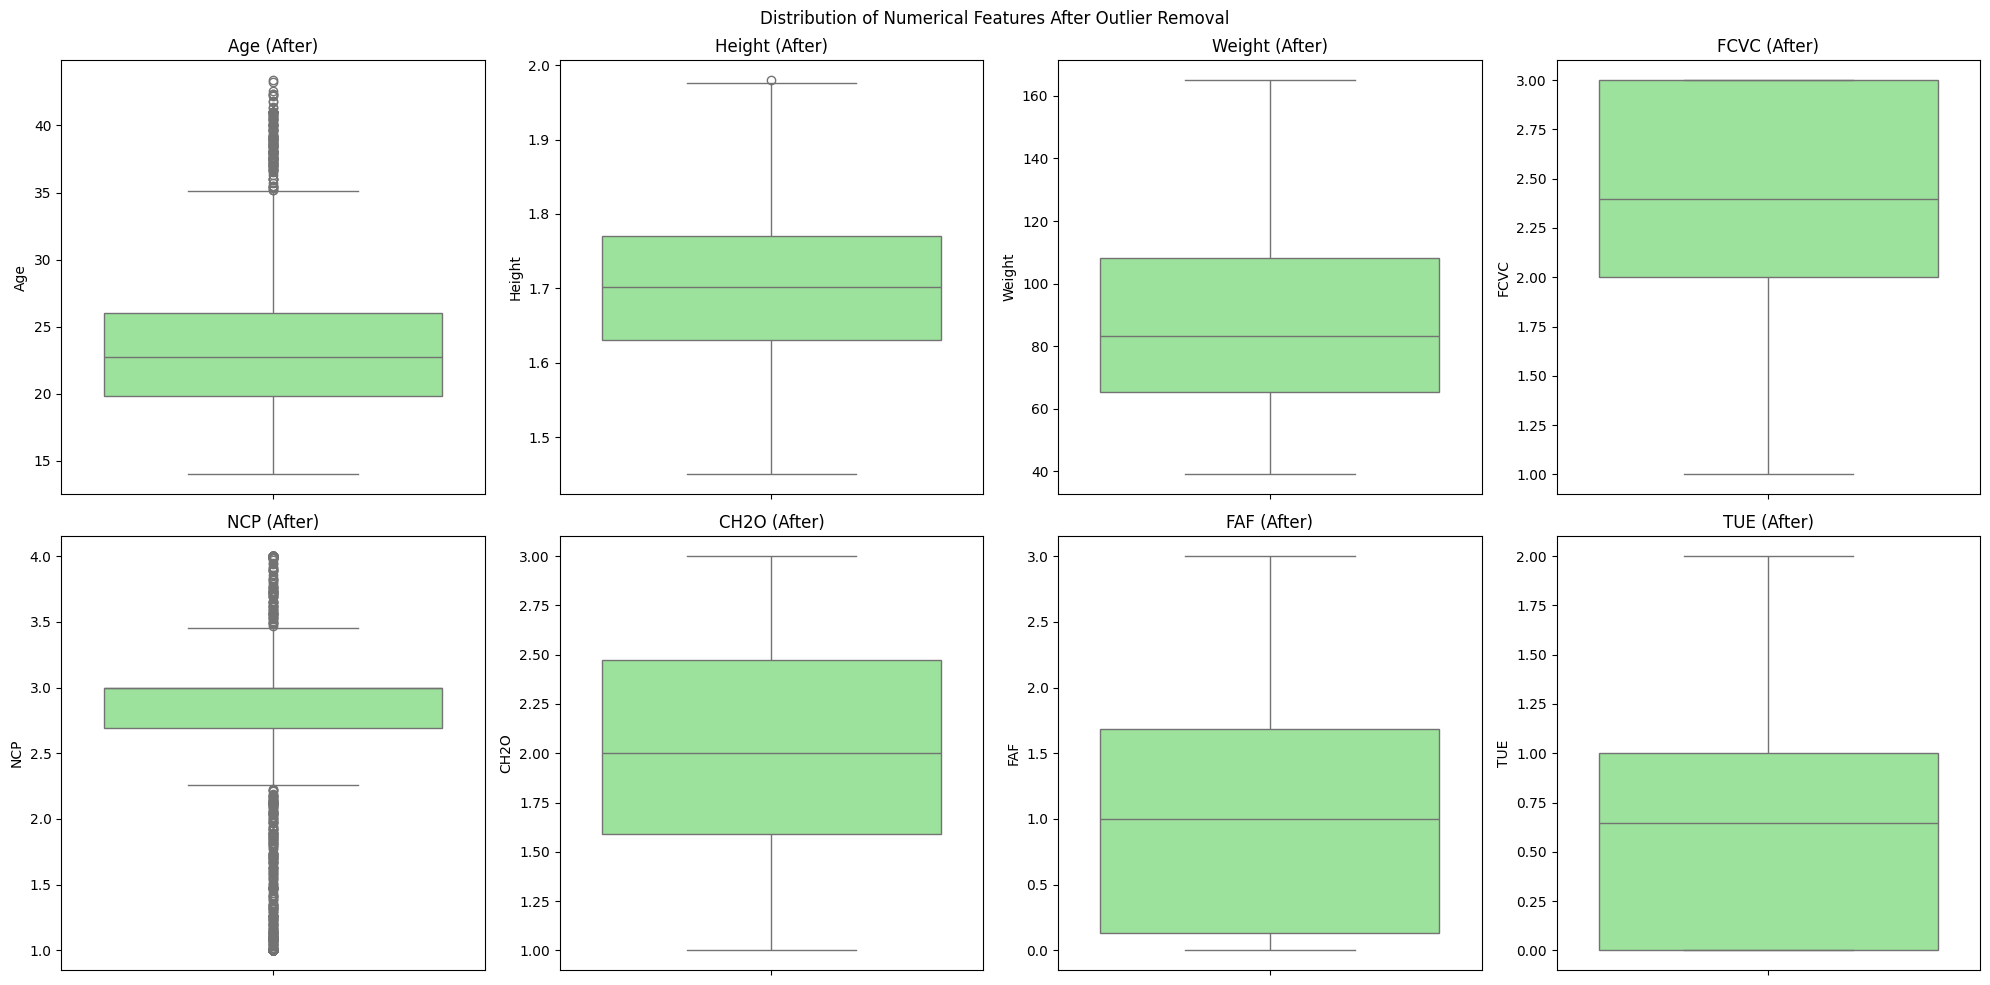

Distribution visualizations complete


In [ ]:
# Visualizing distributions before and after outlier removal

# Create box plots for numerical features before and after outlier removal
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of Numerical Features Before and After Outlier Removal')

for idx, column in enumerate(numerical_columns):
    row = idx // 4
    col = idx % 4

    # Before outlier removal
    sns.boxplot(data=df[column], ax=axes[row, col], color='lightblue')
    axes[row, col].set_title(f'{column} (Before)')

plt.tight_layout()
plt.savefig('distributions_before_outliers.png')
plt.show()

# After outlier removal
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of Numerical Features After Outlier Removal')

for idx, column in enumerate(numerical_columns):
    row = idx // 4
    col = idx % 4

    # After outlier removal
    sns.boxplot(data=df_cleaned[column], ax=axes[row, col], color='lightgreen')
    axes[row, col].set_title(f'{column} (After)')

plt.tight_layout()
plt.savefig('distributions_after_outliers.png')
plt.show()

print("Distribution visualizations complete")

# Visualization

<ipython-input-15-a161f1f15bfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NObeyesdad", y="Weight", data=df, palette="Set3")


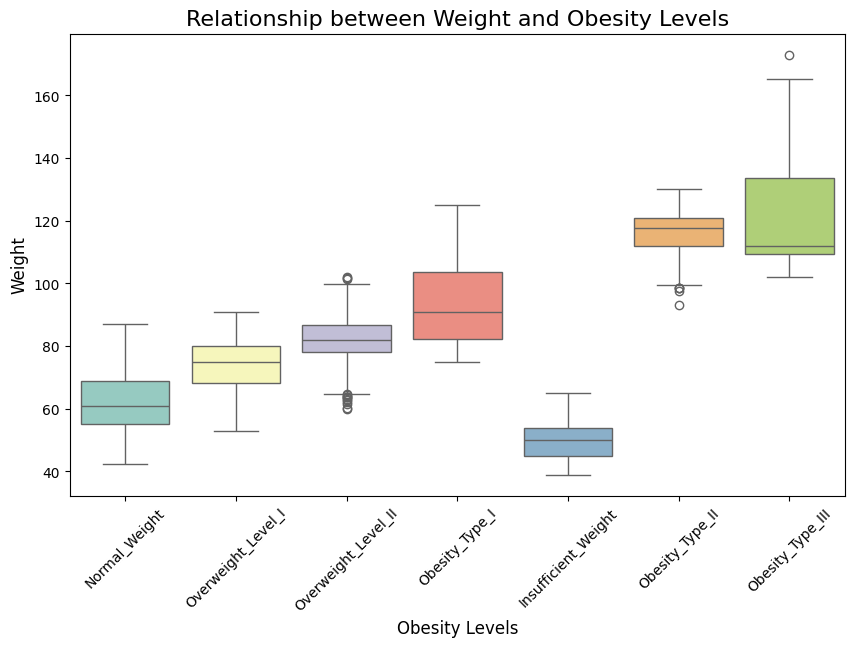

<ipython-input-15-a161f1f15bfd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NObeyesdad", y="FAF", data=df, palette="Set3")


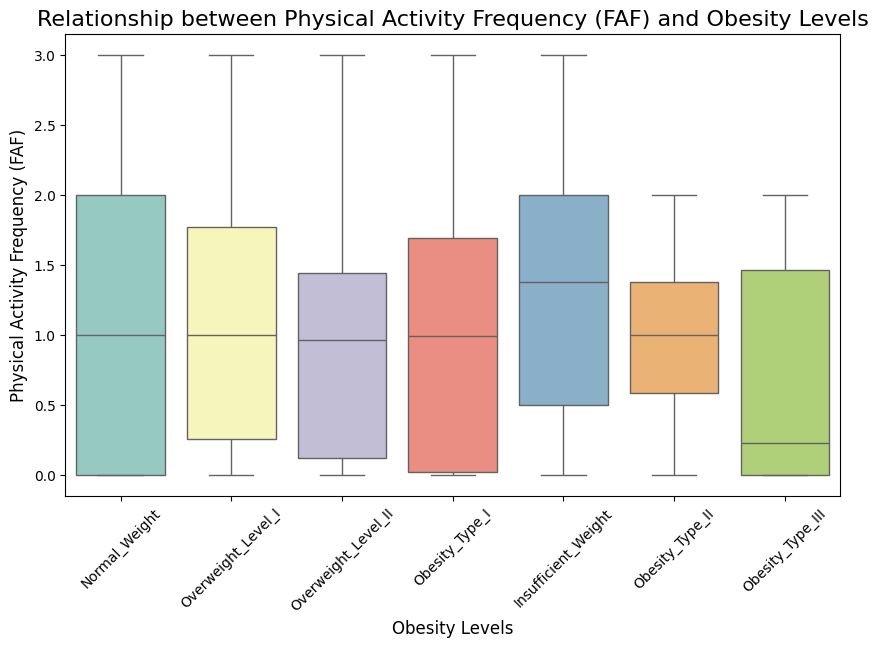

In [ ]:
# Boxplot to explore the relationship between Weight and Obesity Levels
plt.figure(figsize=(10,6))
sns.boxplot(x="NObeyesdad", y="Weight", data=df, palette="Set3")
plt.title("Relationship between Weight and Obesity Levels", fontsize=16)
plt.xlabel("Obesity Levels", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Boxplot to explore the relationship between FAF and Obesity Levels
plt.figure(figsize=(10,6))
sns.boxplot(x="NObeyesdad", y="FAF", data=df, palette="Set3")
plt.title("Relationship between Physical Activity Frequency (FAF) and Obesity Levels", fontsize=16)
plt.xlabel("Obesity Levels", fontsize=12)
plt.ylabel("Physical Activity Frequency (FAF)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

The boxplots reveal the following:

1. Weight vs. Obesity Levels:

* Higher weight values are associated with higher levels of obesity.
* Normal weight and underweight categories tend to cluster around lower weight values, while obesity levels have higher median and spread.

2. Physical Activity Frequency (FAF) vs. Obesity Levels:

* Individuals with higher FAF values (more physical activity) are generally associated with lower levels of obesity.
* Sedentary or less active individuals show a tendency towards higher obesity levels.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


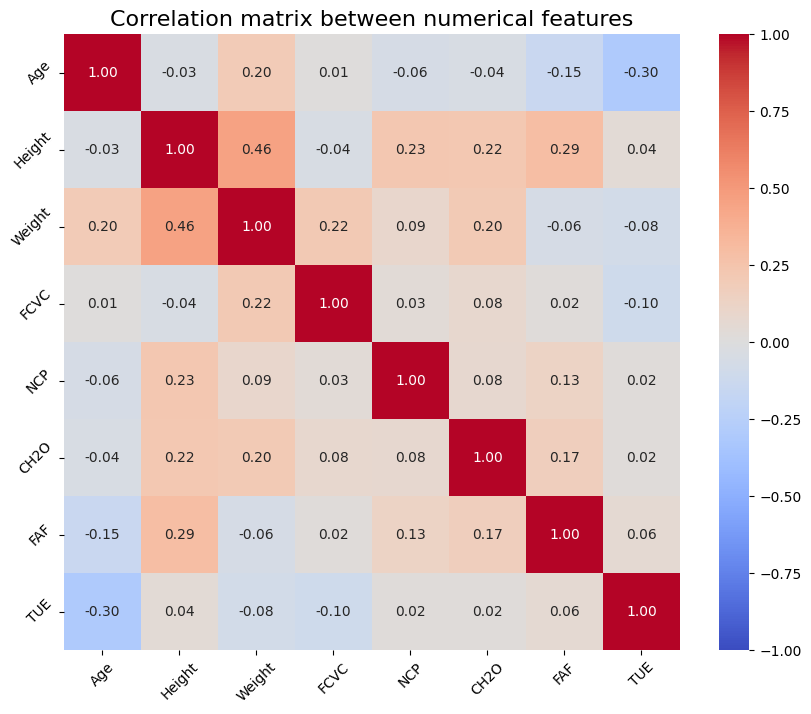

In [ ]:
# correlation among the numerical values
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# plotting the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True, square=True)
plt.title("Correlation matrix between numerical features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Label Encoding and datatype converision

In [ ]:
# Step 1: Load and preprocess data with proper encoding
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Identify binary and multi-class categorical columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
multi_class_columns = ['CAEC', 'CALC', 'MTRANS']

# Separate features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Apply Label Encoding to binary variables
le = LabelEncoder()
for col in binary_columns:
    X[col] = le.fit_transform(X[col])

# Apply One-Hot Encoding to multi-class variables
X_encoded = pd.get_dummies(X, columns=multi_class_columns)

# Scale numeric features using MinMaxScaler
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = MinMaxScaler()
X_encoded[numeric_columns] = scaler.fit_transform(X_encoded[numeric_columns])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Data preprocessing complete with proper encoding")
print("\
Binary columns (Label Encoded):", binary_columns)
print("Multi-class columns (One-Hot Encoded):", multi_class_columns)
print("\
Final feature count:", X_encoded.shape[1])
print("\
Sample of final features:")
print(list(X_encoded.columns)[:10])

Data preprocessing complete with proper encoding
Binary columns (Label Encoded): ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
Multi-class columns (One-Hot Encoded): ['CAEC', 'CALC', 'MTRANS']
Final feature count: 26
Sample of final features:
['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O']


In [ ]:
X_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0.148936,0.320755,0.186567,1,0,0.5,0.666667,0,0.5,0,0.000000,0.5,False,False,True,False,False,False,False,True,False,False,False,True,False
1,0,0.148936,0.132075,0.126866,1,0,1.0,0.666667,1,1.0,1,1.000000,0.0,False,False,True,False,False,False,True,False,False,False,False,True,False
2,1,0.191489,0.660377,0.283582,1,0,0.5,0.666667,0,0.5,0,0.666667,0.5,False,False,True,False,False,True,False,False,False,False,False,True,False
3,1,0.276596,0.660377,0.358209,0,0,1.0,0.666667,0,0.5,0,0.666667,0.0,False,False,True,False,False,True,False,False,False,False,False,False,True
4,1,0.170213,0.622642,0.379104,0,0,0.5,0.000000,0,0.5,0,0.000000,0.0,False,False,True,False,False,False,True,False,False,False,False,True,False


In [ ]:
# Training and evaluating Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Random Forest evaluation
rf_cm = confusion_matrix(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest Results:")
print("\
Confusion Matrix:")
print(rf_cm)
print("\
Classification Report:")
print(rf_report)

Random Forest Results:
Confusion Matrix:
[[53  6  0  0  0  0  0]
 [ 1 58  0  0  0  2  0]
 [ 0  1 67  0  0  0  2]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  4  0  0  0 49  2]
 [ 0  2  0  0  0  0 47]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.90      0.94        59
      Normal_Weight       0.82      0.95      0.88        61
     Obesity_Type_I       1.00      0.96      0.98        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.96      0.89      0.92        55
Overweight_Level_II       0.92      0.96      0.94        49

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.96      0.95      0.95       418



In [ ]:
# Training and evaluating Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Logistic Regression evaluation
lr_cm = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)

print("Logistic Regression Results:")
print("\
Confusion Matrix:")
print(lr_cm)
print("\
Classification Report:")
print(lr_report)

Logistic Regression Results:
Confusion Matrix:
[[48  9  0  0  0  2  0]
 [14 27  3  0  0 14  3]
 [ 0  0 50  7  1  4  8]
 [ 0  0  0 63  0  0  1]
 [ 0  0  0  0 60  0  0]
 [ 0  5  7  0  0 32 11]
 [ 0  4 12  1  0  5 27]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.81      0.79        59
      Normal_Weight       0.60      0.44      0.51        61
     Obesity_Type_I       0.69      0.71      0.70        70
    Obesity_Type_II       0.89      0.98      0.93        64
   Obesity_Type_III       0.98      1.00      0.99        60
 Overweight_Level_I       0.56      0.58      0.57        55
Overweight_Level_II       0.54      0.55      0.55        49

           accuracy                           0.73       418
          macro avg       0.72      0.73      0.72       418
       weighted avg       0.73      0.73      0.73       418



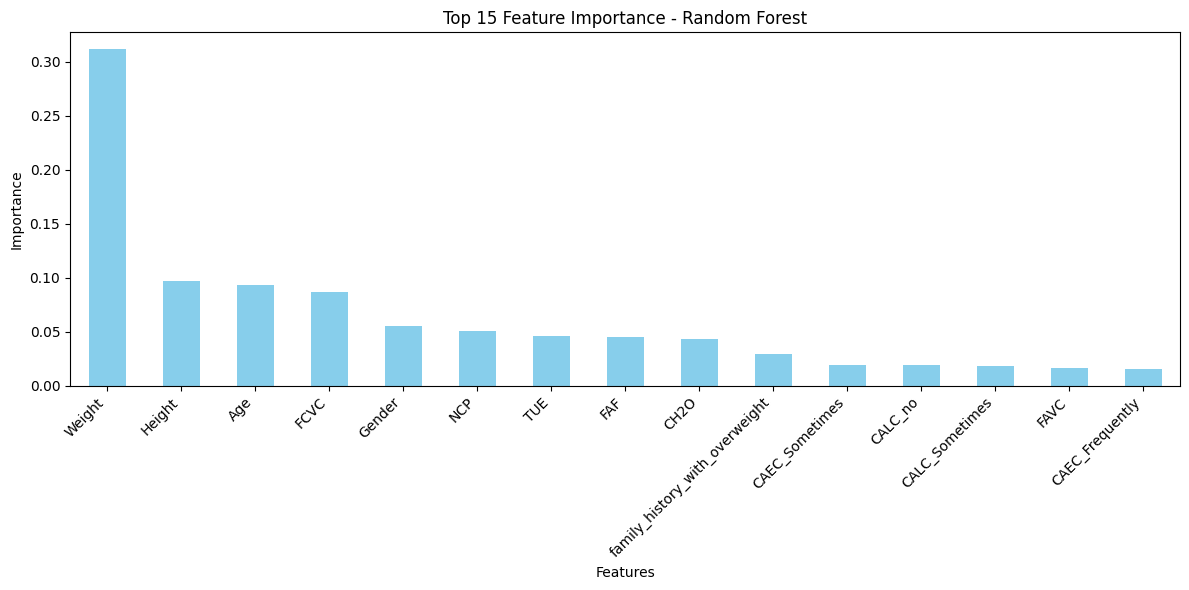

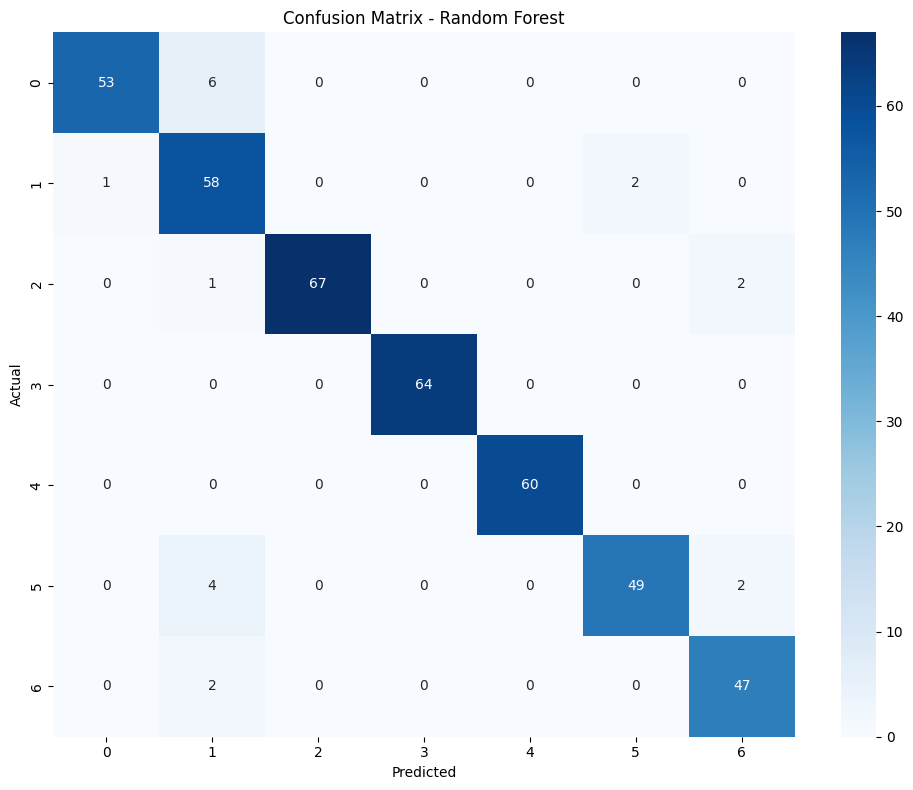

Visualizations complete


In [ ]:
# Visualize feature importance for Random Forest
feature_importance = pd.Series(rf_model.feature_importances_,
                             index=X_encoded.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_importance.head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Feature Importance - Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("Visualizations complete")

The Random Forest model performs significantly better than Logistic Regression, achieving 95% accuracy compared to 73%. The feature importance plot shows which variables have the strongest influence on the obesity classification.

Here's a breakdown of the two classification reports:

1. Accuracy: This is the proportion of correctly predicted instances (both positive and negative) out of the total instances. In this case, the Random Forest model achieved an accuracy of 95%, meaning it correctly predicted 96% of the obesity levels in the dataset, while the Logistic Regression model only achieved 73% accuracy.

2. Precision: This metric indicates the proportion of true positive predictions (correctly predicted obesity levels) out of all positive predictions made by the model. High precision means that when the model predicts a certain class (e.g., a specific obesity level), it is likely to be correct. If the Random Forest model has higher precision than Logistic Regression, it means that it makes fewer false positive predictions.

3. Recall (Sensitivity): This metric measures the proportion of true positive predictions out of all actual positive instances in the dataset. High recall means that the model is good at identifying all relevant instances. If the Random Forest model has better recall, it means it successfully identifies more instances of obesity levels compared to Logistic Regression.

4. F1-score: This is the harmonic mean of precision and recall, providing a balance between the two. It is particularly useful when dealing with imbalanced datasets. A higher F1-score indicates a better balance between precision and recall. If the Random Forest model has a higher F1-score, it suggests that it performs better overall in classifying the obesity levels.

In summary, the comparison indicates that the Random Forest model is more effective than the Logistic Regression model in predicting obesity levels, as evidenced by its higher accuracy, precision, recall, and F1-scores across all classes. This suggests that Random Forest is better suited for this particular classification task, likely due to its ability to capture complex relationships in the data.